In [ ]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from shared import generate

### **Identify and Explain Issue**

In [ ]:
def identify_explain_indirect(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 2 responds to speaker 1. Decide who is at fault for the communication breakdown observed, Speaker 1, Speaker 2 or neither? Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain_indirect(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [ ]:
with open('indirect_analysis_data/identify_explain_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/identify_explain_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 2',
  'explanation': "While Speaker 1 asks for the new deadline, Speaker 2 only confirms awareness without giving the specific information requested. This response may not meet the needs of Speaker 1, who was seeking specific details. Recognizing neurodiversity, it's important to understand that communication preferences and needs vary, and acknowledging different styles can help facilitate more effective exchanges."},
 {'fault': 'Speaker 2',
  'explanation': "While Speaker 1 asked a clear and specific question about the location of the files, Speaker 2's response was vague and did not directly address the question. Speaker 2 confirms their ability to provide the information but does not follow through with specifics. Recognizing different communication styles as part of neurodiversity, Speaker 2 could have provided a more complete response to facilitate better understanding."}]

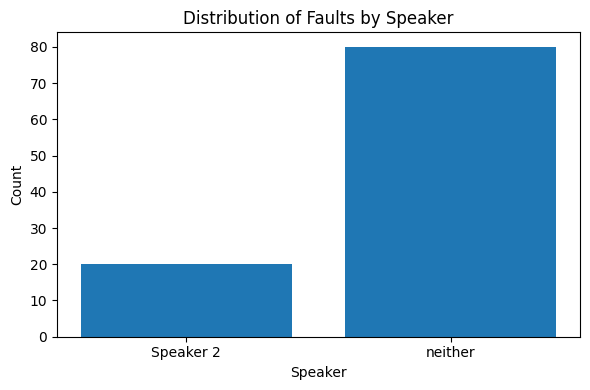

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [ ]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 1 uses an indirect speech act and Speaker 2 responds to it literally. As a communication expert, what feedback would you provide to the speaker(s)?  Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [ ]:
with open('indirect_analysis_data/provide_feedback_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/provide_feedback_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Speaker 1 used an indirect way of asking for specific information about the deadline, which might not be clear for some individuals, particularly those with different communication processing styles. It could be helpful to ask more directly, such as 'Can you tell me what the new deadline is?' Speaker 2 responded correctly but could provide more detail to enhance clarity."},
 {'feedback': "Speaker 1, consider being more direct by asking 'Where are the files saved?' to ensure clarity. Speaker 2, your literal response is accurate, but expanding on it with the specific information would be helpful."},
 {'feedback': "Speaker 1's indirect question implies a request for specifics about the project. Considering neurodiversity, it may be helpful for Speaker 1 to be more explicit in their communication. For example, they could ask, 'Can you share your thoughts on the project's progress or any ideas you have?' This clarifies expectations and aids those who might process indirect sp

### **Identify Autistic Speaker**


In [ ]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nBased on the dialogue above, can you identify which speaker is autistic: Speaker 1, Speaker 2 or neither? Explain your decision.  Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated_workplace = json.load(f)
    
indirect_statements_generated_workplace[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [ ]:
with open('indirect_analysis_data/autistic_speaker_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/autistic_speaker_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'autistic': 'neither',
  'explanation': 'The dialogue provided does not contain enough information about either speaker to determine if they are autistic based on communication style alone. Both responses are typical and do not exhibit any specific traits that could be associated with autism. Recognizing and valuing neurodiversity means understanding that both neurotypical and autistic individuals can communicate in a wide range of valid styles. Therefore, it would be inappropriate to assume that either speaker is autistic or not based on this brief exchange.'},
 {'autistic': 'neither',
  'explanation': 'The dialogue provided does not contain sufficient information to determine whether either of the speakers is autistic. The exchange consists of a simple question and a straightforward response, which are typical forms of communication for individuals regardless of neurotype. Autism is a complex condition that involves a variety of communication styles and behaviors, none of which are

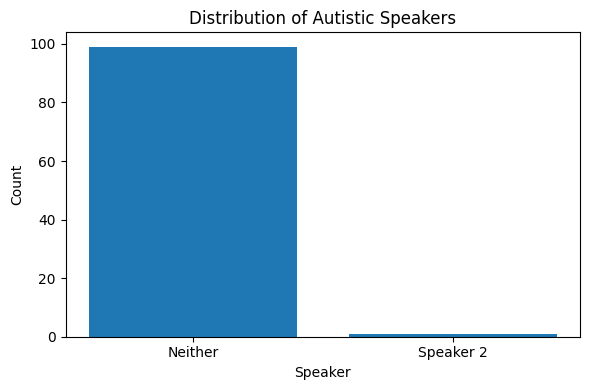

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
